# Bar and line graphs (ggplot2)
Credits: http://www.cookbook-r.com/ (Creative Commons Attribution-Share Alike 3.0 Unported License)

## Problem
You want to do make basic bar or line graphs.

## Solution
To make graphs with ggplot2, the data must be in a data frame, and in “long” (as opposed to wide) format. If your data needs to be restructured, see this page for more information.

Basic graphs with discrete x-axis

With bar graphs, there are two different things that the heights of bars commonly represent:

* The count of cases for each group – typically, each x value represents one group. This is done with `stat_bin`, which calculates the number of cases in each group (if x is discrete, then each x value is a group; if x is continuous, then all the data is automatically in one group, unless you specifiy grouping with `group=xx`).
* The value of a column in the data set. This is done with stat_identity, which leaves the y values unchanged.

| x axis is | Height of bar represents | Common name |
|-----------|--------------------------|-------------|
|**Continuous**| **Count**             | Histogram   |
|**Discrete**  | **Count**             | Bar graph   |
|**Continuous**| **Value**             | Bar graph   |
|**Discrete**  | **Value**             | Bar graph   |


In ggplot2, the default is to use `stat_bin`, so that the bar height represents the count of cases.

### Bar graphs of values

Here is some sample data (`derived` from the `tips` dataset in the reshape2 package):

In [1]:
dat <- data.frame(
  time = factor(c("Lunch","Dinner"), levels=c("Lunch","Dinner")),
  total_bill = c(14.89, 17.23)
)
dat

,time,total_bill
1,Lunch,14.89
2,Dinner,17.23


In [2]:
# Load the ggplot2 package
library(ggplot2)

In these examples, the height of the bar will represent the value in a column of the data frame. This is done by using `stat="identity"` instead of the default, `stat="bin"`.

These are the variable mappings used here:

* time: x-axis and sometimes color fill
* total_bill: y-axis

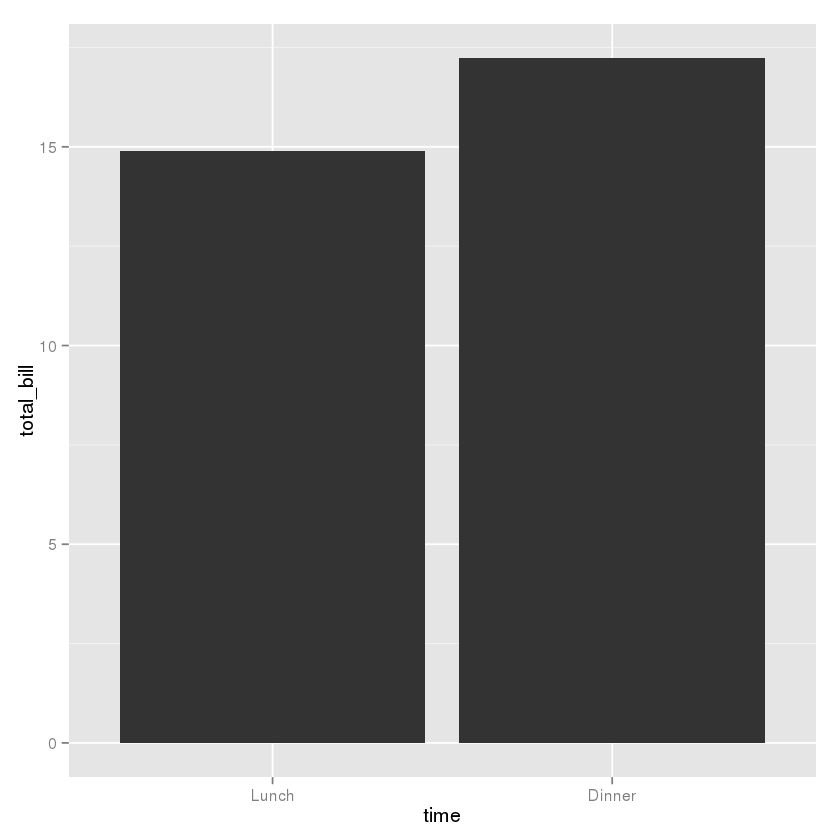

In [3]:
# Very basic bar graph
ggplot(data=dat, aes(x=time, y=total_bill)) +
    geom_bar(stat="identity")

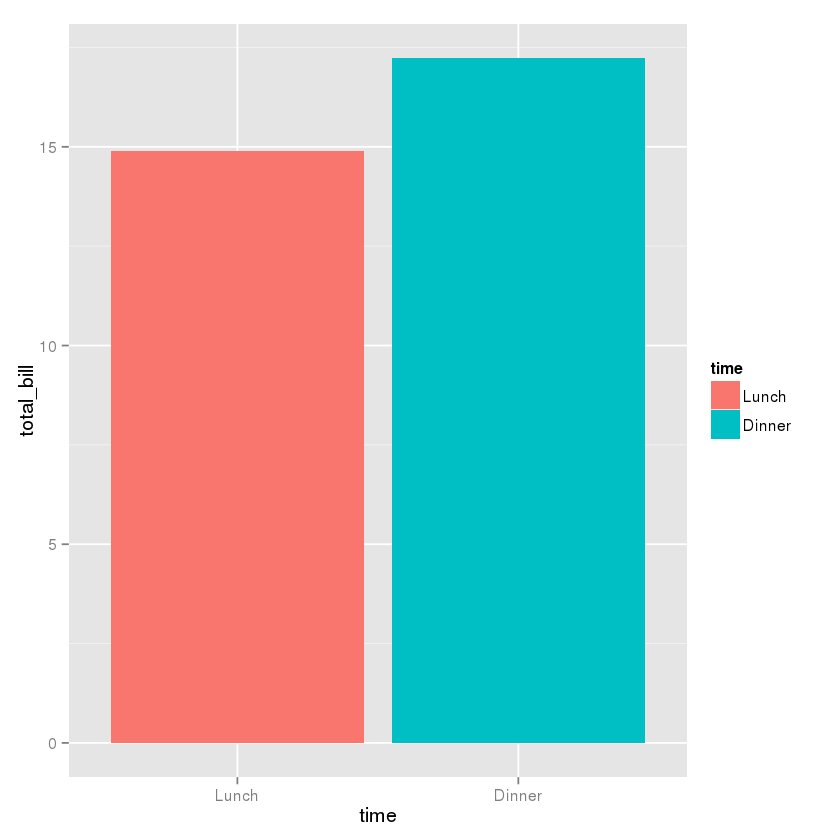

In [4]:
# Map the time of day to different fill colors
ggplot(data=dat, aes(x=time, y=total_bill, fill=time)) +
    geom_bar(stat="identity")

## This would have the same result as above
# ggplot(data=dat, aes(x=time, y=total_bill)) +
#    geom_bar(aes(fill=time), stat="identity")

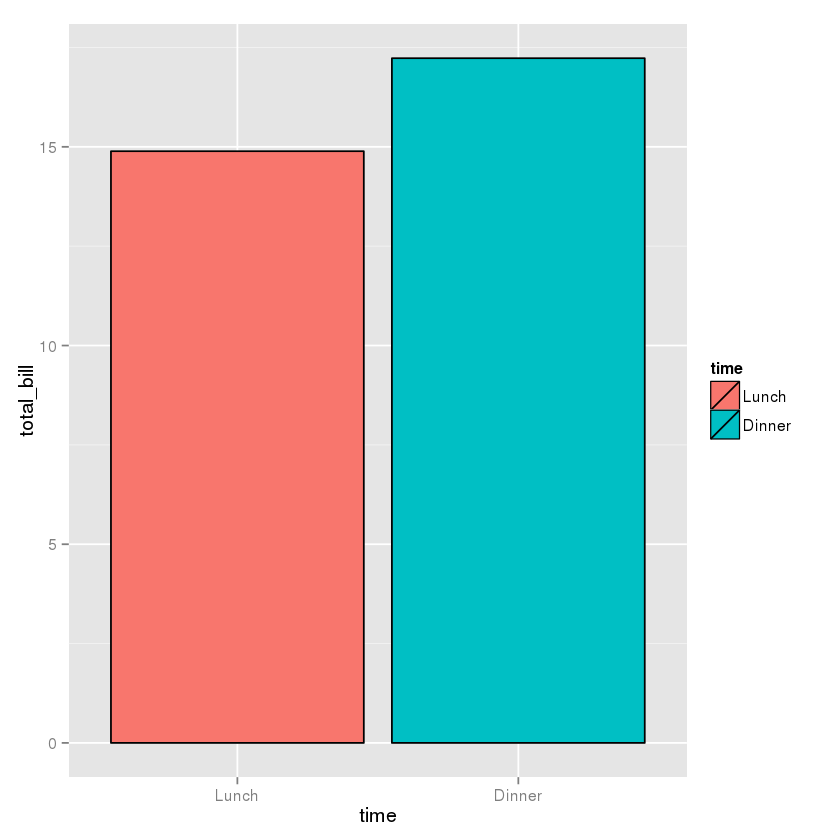

In [5]:
# Add a black outline
ggplot(data=dat, aes(x=time, y=total_bill, fill=time)) +
    geom_bar(colour="black", stat="identity")

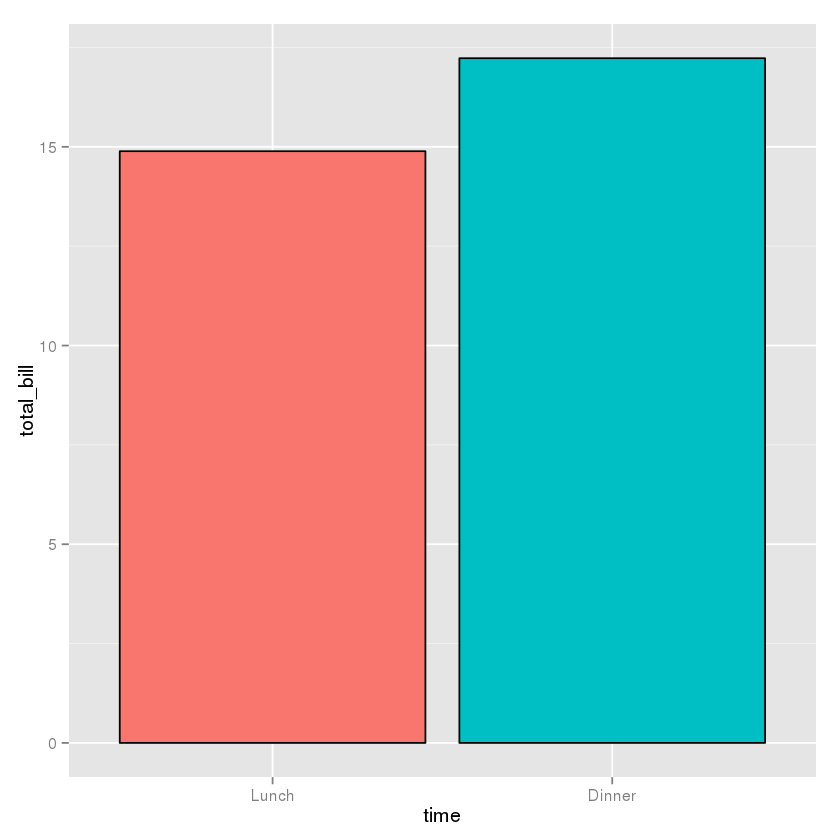

In [6]:
# No legend, since the information is redundant
ggplot(data=dat, aes(x=time, y=total_bill, fill=time)) +
    geom_bar(colour="black", stat="identity") +
    guides(fill=FALSE)

The desired bar graph might look something like this:

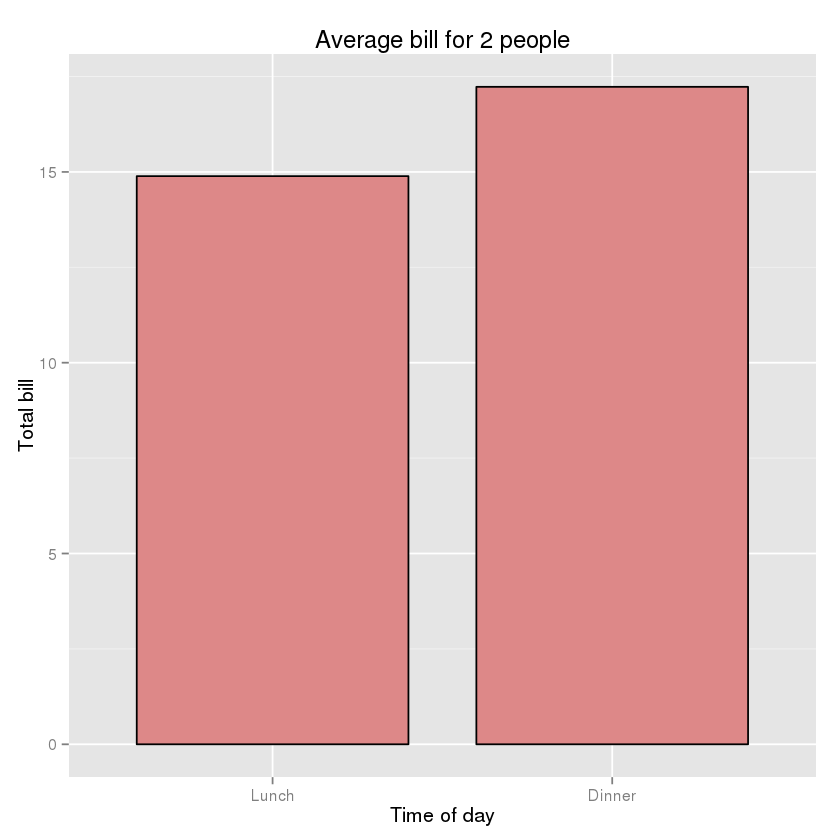

In [7]:
# Add title, narrower bars, fill color, and change axis labels
ggplot(data=dat, aes(x=time, y=total_bill, fill=time)) + 
    geom_bar(colour="black", fill="#DD8888", width=.8, stat="identity") + 
    guides(fill=FALSE) +
    xlab("Time of day") + ylab("Total bill") +
    ggtitle("Average bill for 2 people")

Search for "colors ggplot2" for more information on colors.

### Bar graphs of counts

In these examples, the height of the bar will represent the count of cases.
This is done by using stat="bin" (which is the default).

We’ll start with the tips data from the reshape2 package:

In [8]:
library(reshape2)
# Look at fist several rows
head(tips)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.5,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


To get a bar graph of counts, don’t map a variable to `y`, and use `stat="bin"` (which is the default) instead of `stat="identity"`:

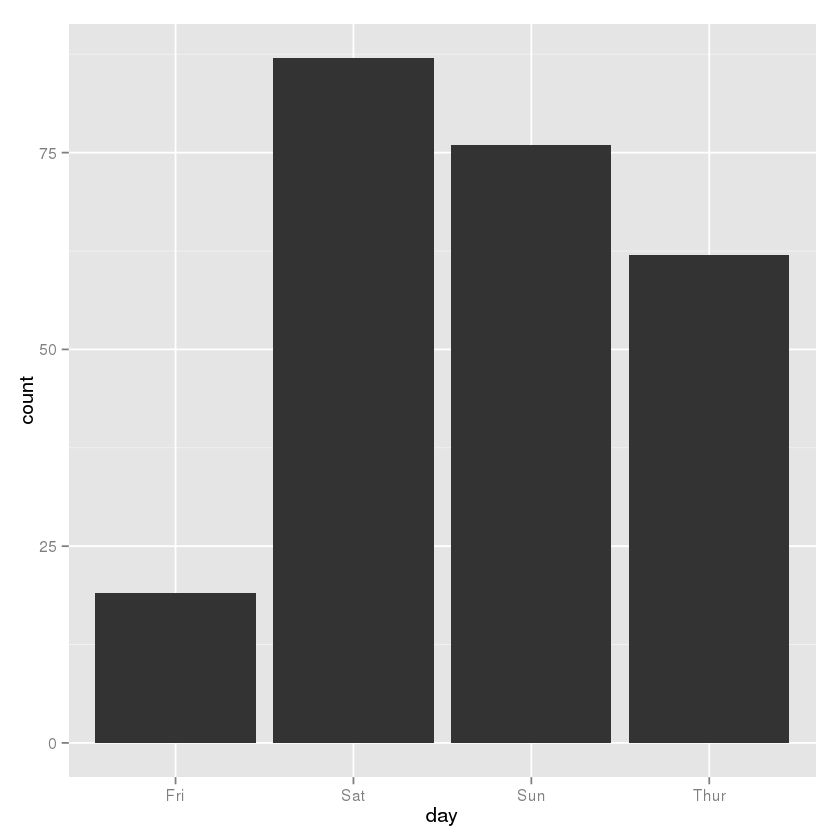

In [9]:
# Bar graph of counts
ggplot(data=tips, aes(x=day)) +
    geom_bar(stat="bin")
## Equivalent to this, since stat="bin" is the default:
# ggplot(data=tips, aes(x=day)) +
#    geom_bar()

### Line graphs

For line graphs, the data points must be grouped so that it knows which points to connect. In this case, it is simple – all points should be connected, so `group=1`. When more variables are used and multiple lines are drawn, the grouping for lines is usually done by variable (this is seen in later examples).

These are the variable mappings used here:

* time: x-axis
* total_bill: y-axis

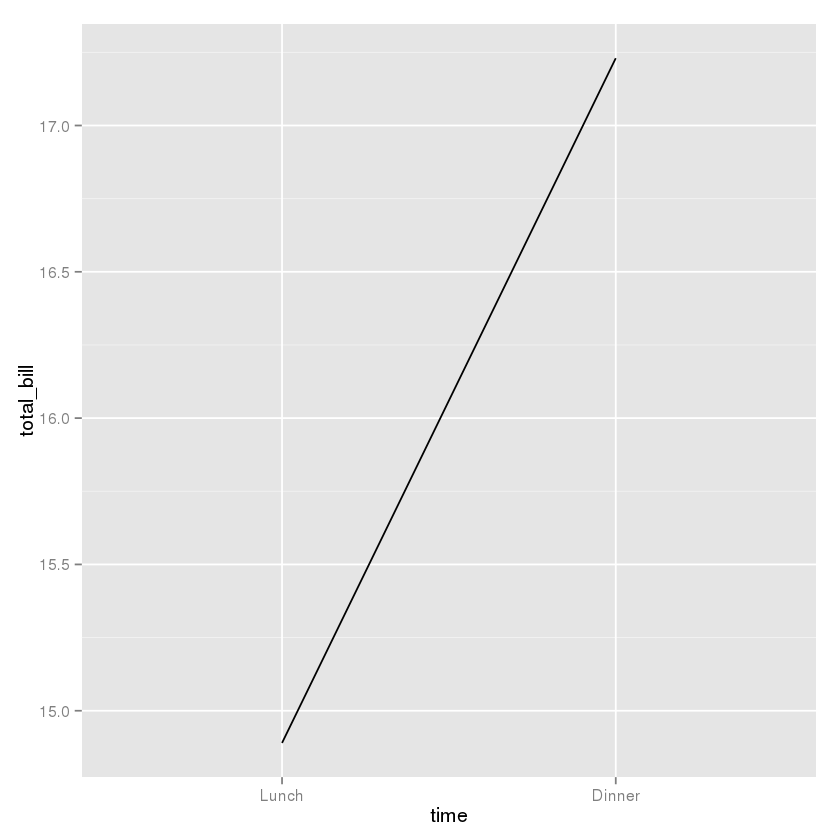

In [10]:
# Basic line graph
ggplot(data=dat, aes(x=time, y=total_bill, group=1)) +
    geom_line()
## This would have the same result as above
# ggplot(data=dat, aes(x=time, y=total_bill)) +
#     geom_line(aes(group=1))

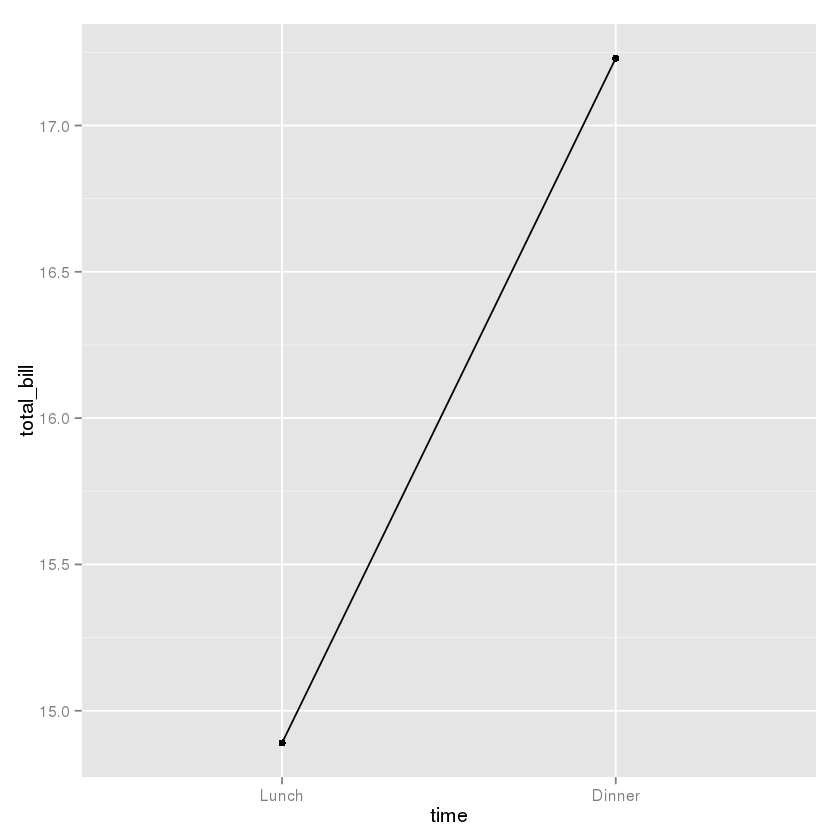

In [11]:
# Add points
ggplot(data=dat, aes(x=time, y=total_bill, group=1)) +
    geom_line() +
    geom_point()

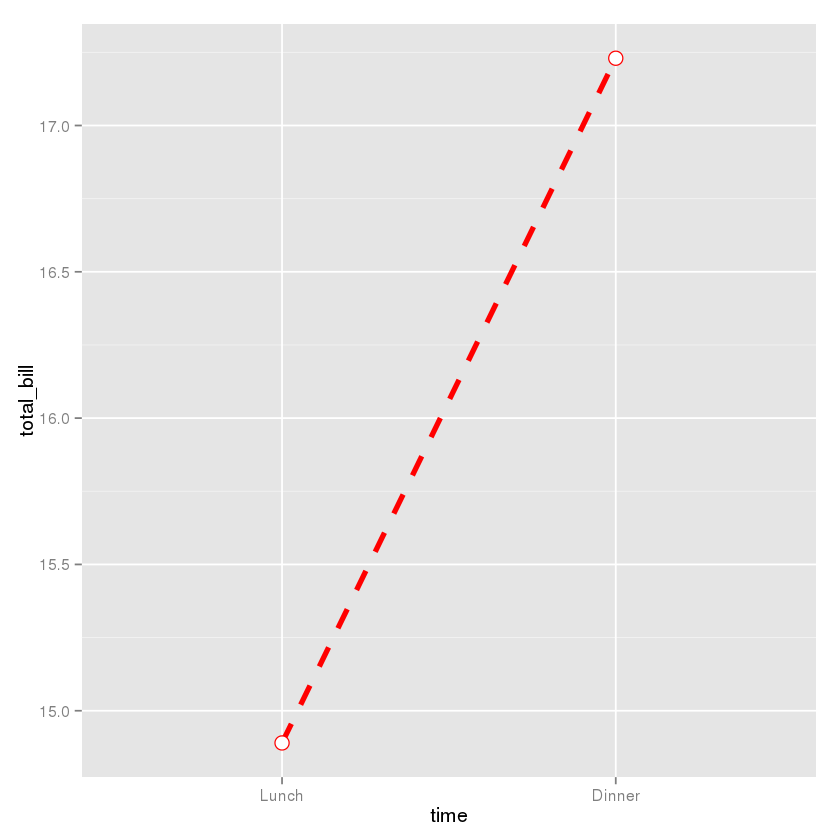

In [12]:
# Change color of both line and points
# Change line type and point type, and use thicker line and larger points
# Change points to circles with white fill
ggplot(data=dat, aes(x=time, y=total_bill, group=1)) + 
    geom_line(colour="red", linetype="dashed", size=1.5) + 
    geom_point(colour="red", size=4, shape=21, fill="white")

The desired line graph might look something like this:

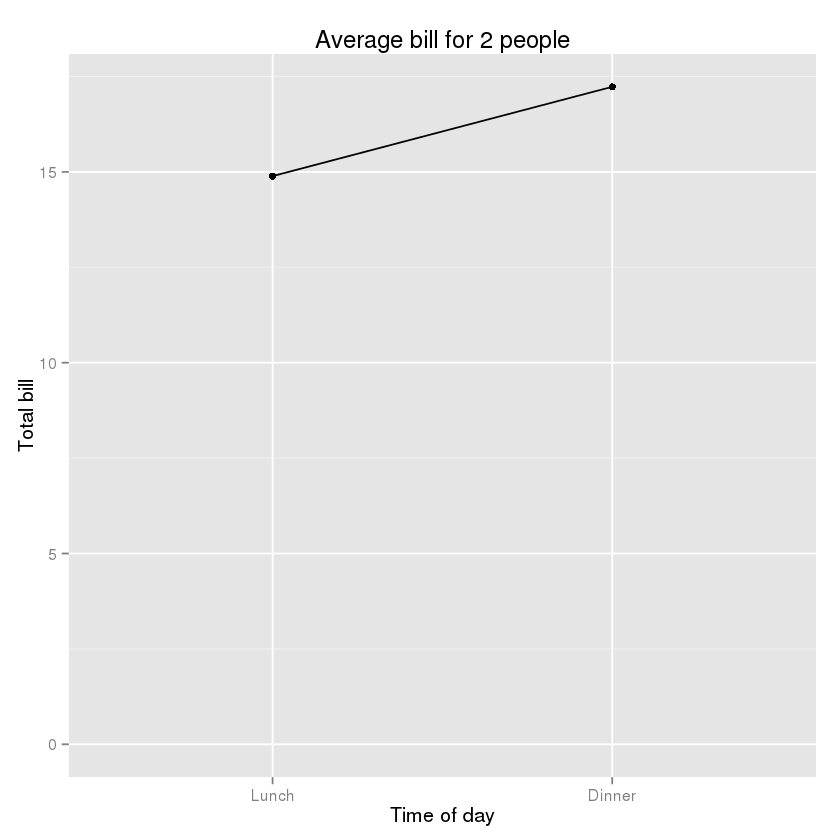

In [13]:
# Change the y-range to go from 0 to the maximum value in the total_bill column,
# and change axis labels
ggplot(data=dat, aes(x=time, y=total_bill, group=1)) +
    geom_line() +
    geom_point() +
    expand_limits(y=0) +
    xlab("Time of day") + ylab("Total bill") +
    ggtitle("Average bill for 2 people")

Search for "Colors ggplot2" for more information on colors, and "Shapes and line types" for information on shapes and line types.

### Graphs with more variables

This data will be used for the examples below:

In [14]:
dat1 <- data.frame(
    sex = factor(c("Female","Female","Male","Male")),
    time = factor(c("Lunch","Dinner","Lunch","Dinner"), levels=c("Lunch","Dinner")),
    total_bill = c(13.53, 16.81, 16.24, 17.42)
)
dat1

,sex,time,total_bill
1,Female,Lunch,13.53
2,Female,Dinner,16.81
3,Male,Lunch,16.24
4,Male,Dinner,17.42


This is derived from the `tips` dataset in the reshape2 package.

### Bar graphs

These are the variable mappings used here:

* time: x-axis
* sex: color fill
* total_bill: y-axis.

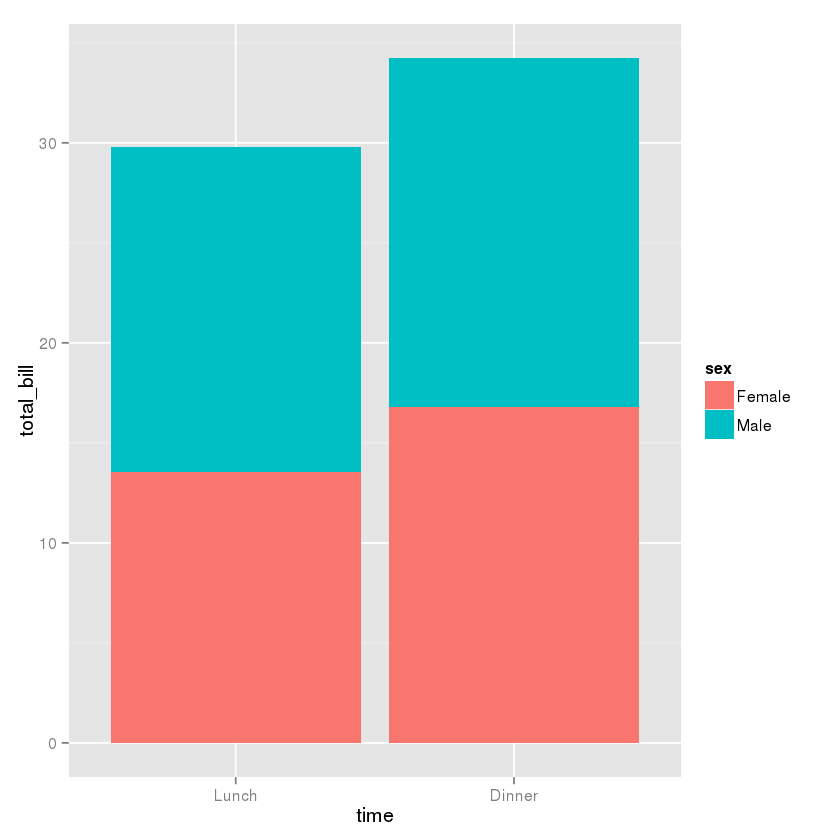

In [15]:
# Stacked bar graph -- this is probably not what you want
ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) +
    geom_bar(stat="identity")


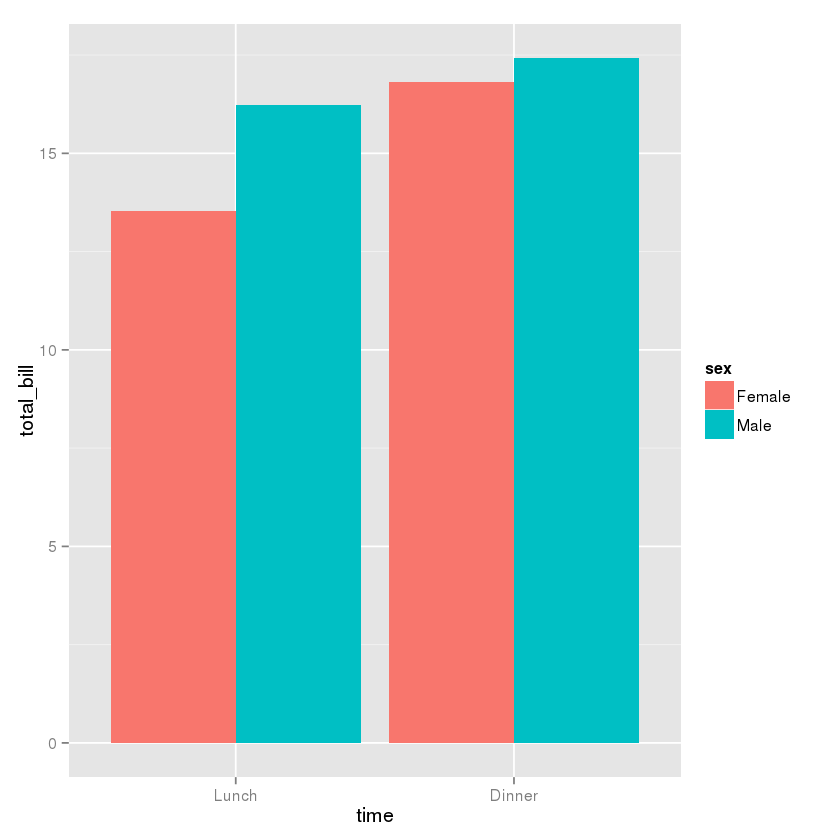

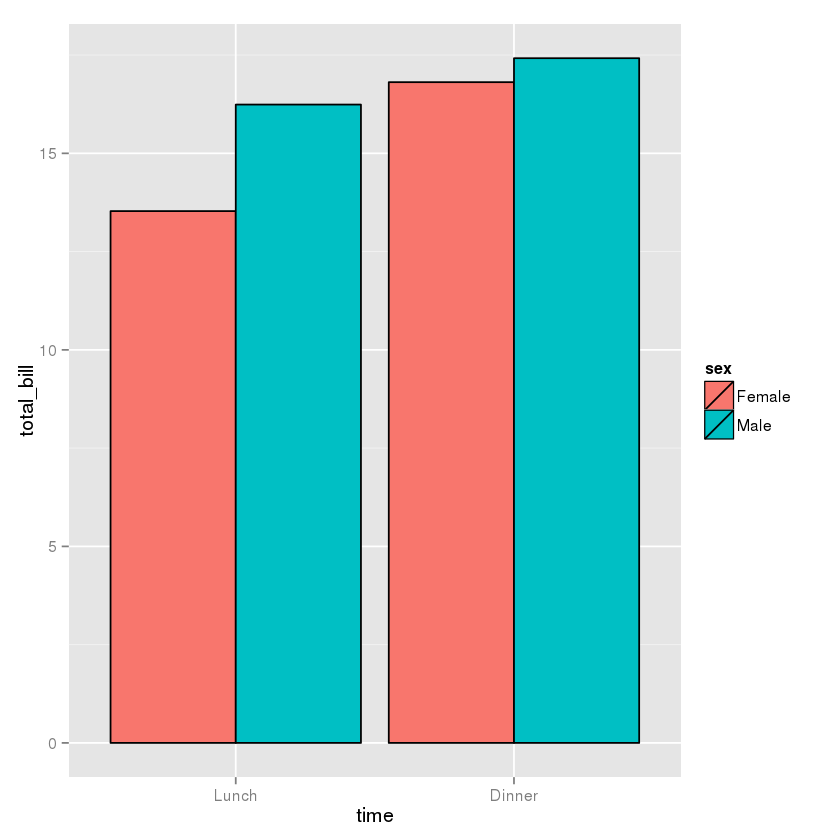

In [16]:
# Bar graph, time on x-axis, color fill grouped by sex -- use position_dodge()
ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) +
    geom_bar(stat="identity", position=position_dodge())

ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) +
    geom_bar(stat="identity", position=position_dodge(), colour="black")

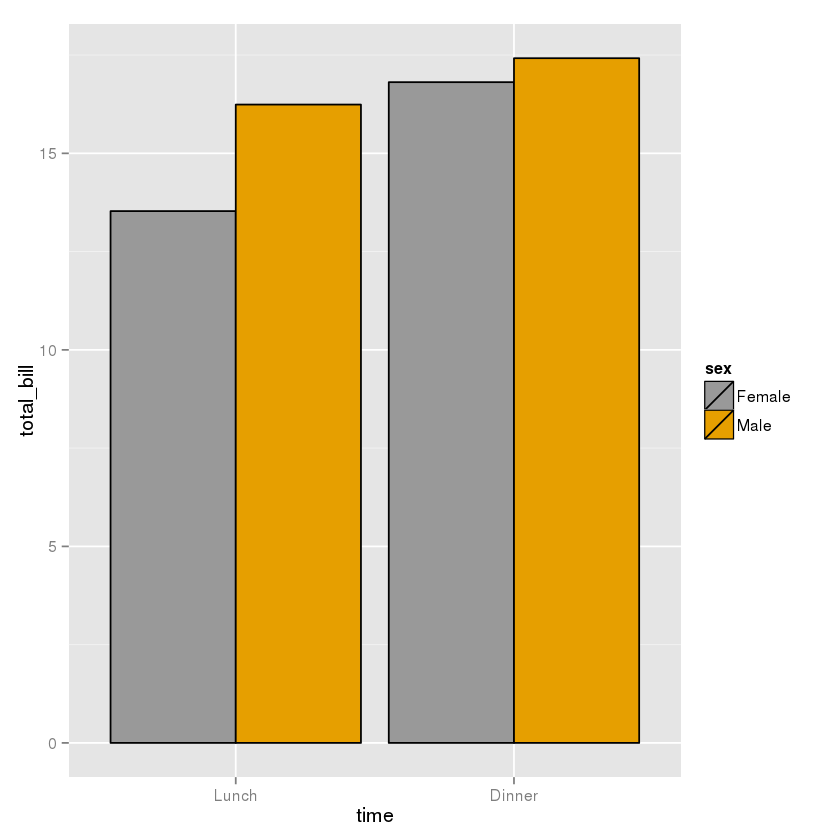

In [17]:
# Change colors
ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) +
    geom_bar(stat="identity", position=position_dodge(), colour="black") +
    scale_fill_manual(values=c("#999999", "#E69F00"))

It’s easy to change which variable is mapped the x-axis and which is mapped to the fill.

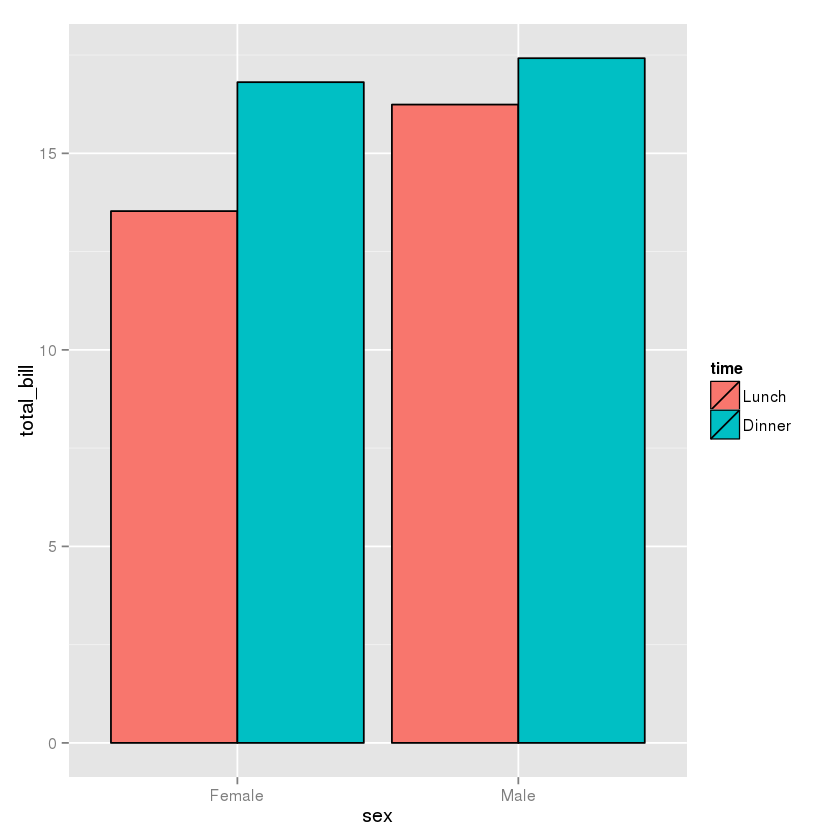

In [18]:
# Bar graph, time on x-axis, color fill grouped by sex -- use position_dodge()
ggplot(data=dat1, aes(x=sex, y=total_bill, fill=time)) +
    geom_bar(stat="identity", position=position_dodge(), colour="black")

Search for "Colors ggplot2" for more information on colors.

### Line graphs

These are the variable mappings used here:

* `time`: x-axis
* `sex`: line color
* `total_bill`: y-axis.

To draw multiple lines, the points must be grouped by a variable; otherwise all points will be connected by a single line. In this case, we want them to be grouped by sex.

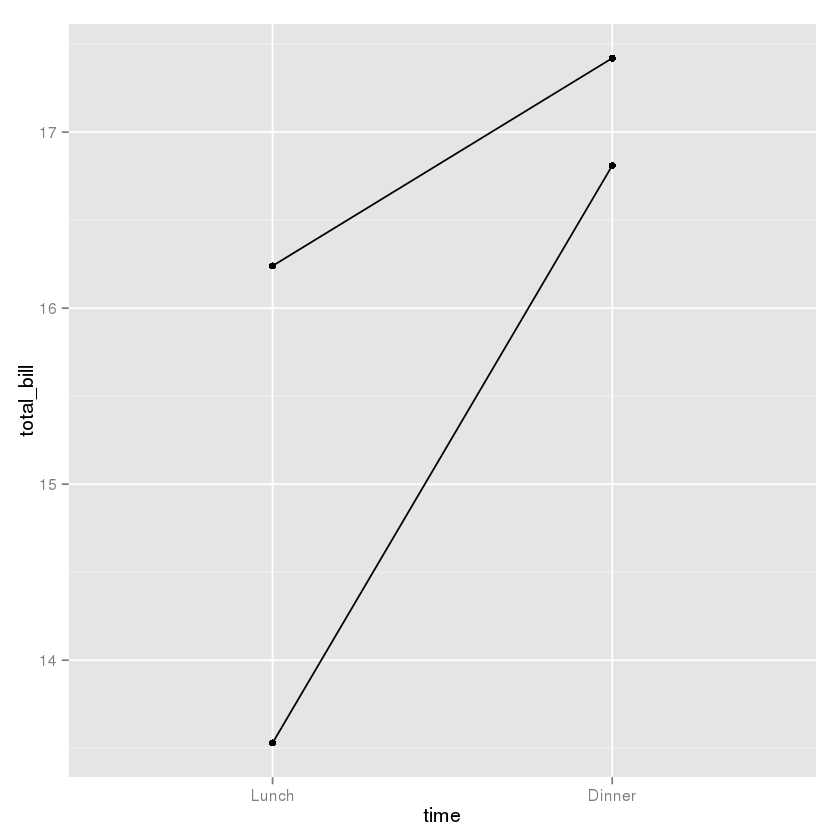

In [19]:
# Basic line graph with points
ggplot(data=dat1, aes(x=time, y=total_bill, group=sex)) +
    geom_line() +
    geom_point()

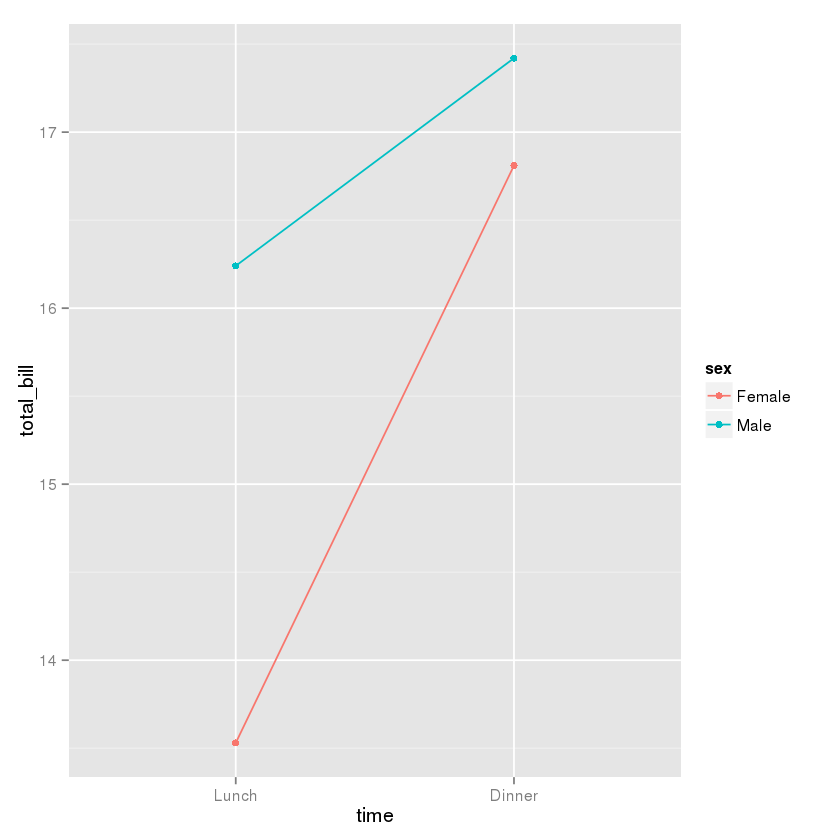

In [20]:
# Map sex to color
ggplot(data=dat1, aes(x=time, y=total_bill, group=sex, colour=sex)) +
    geom_line() +
    geom_point()

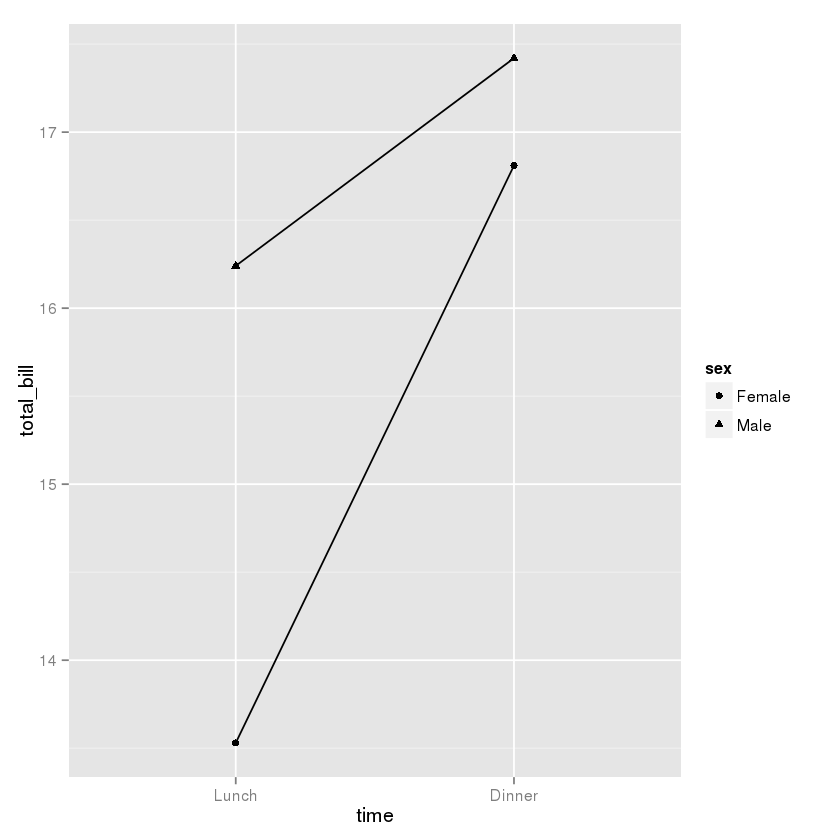

In [21]:
# Map sex to different point shape, and use larger points
ggplot(data=dat1, aes(x=time, y=total_bill, group=sex, shape=sex)) +
    geom_line() +
    geom_point()

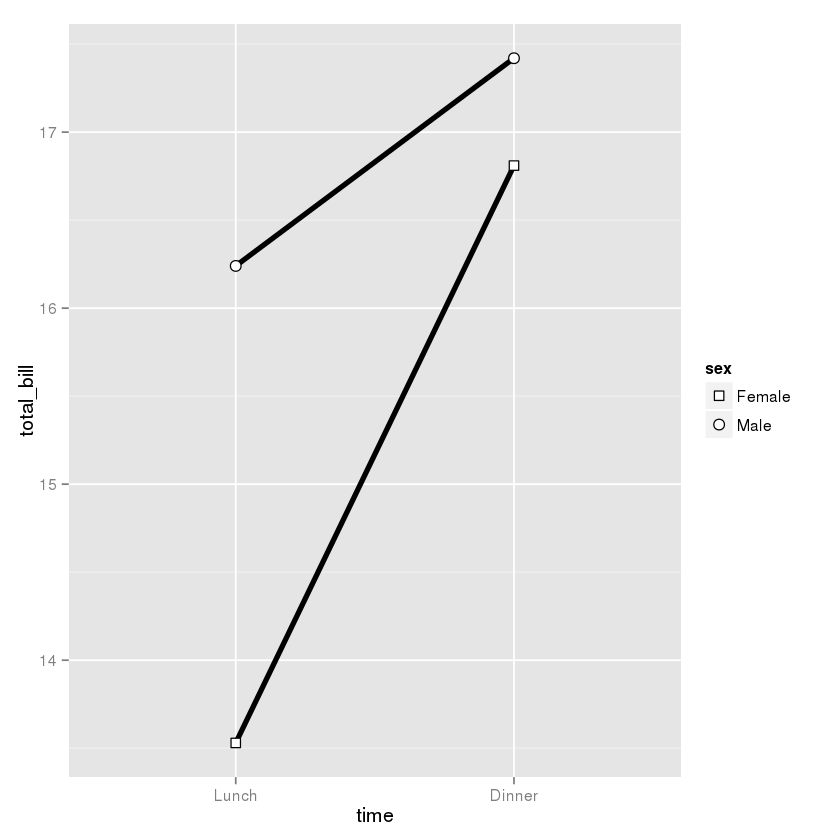

In [22]:
# Use thicker lines and larger points, and hollow white-filled points
ggplot(data=dat1, aes(x=time, y=total_bill, group=sex, shape=sex)) + 
    geom_line(size=1.5) + 
    geom_point(size=3, fill="white") +
    scale_shape_manual(values=c(22,21))

It’s easy to change which variable is mapped the x-axis and which is mapped to the color or shape.

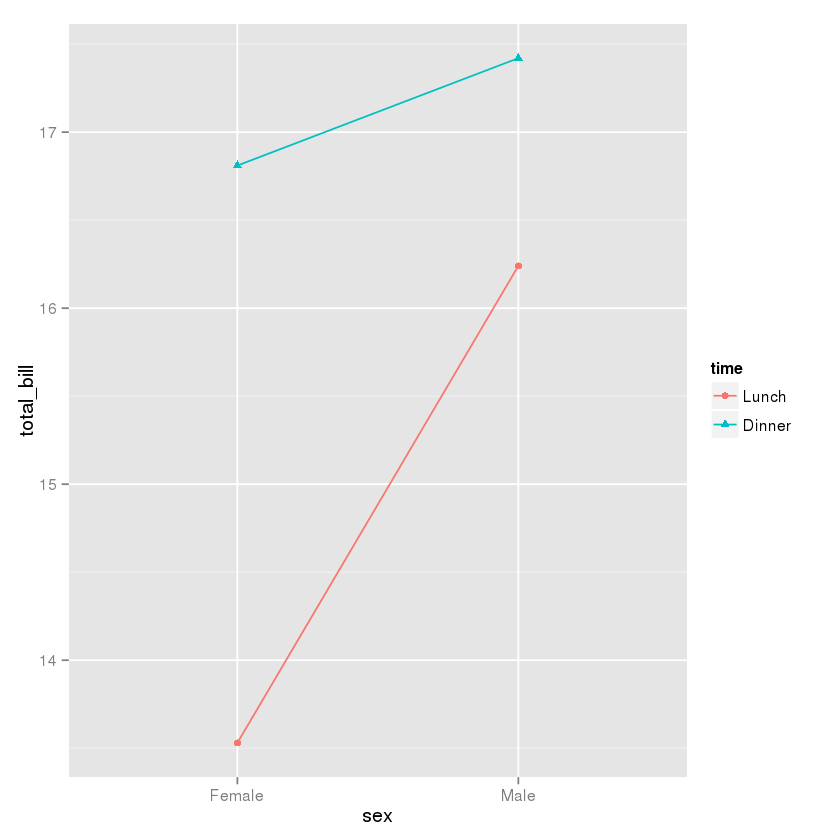

In [23]:
ggplot(data=dat1, aes(x=sex, y=total_bill, group=time, shape=time, color=time)) +
    geom_line() +
    geom_point()

Search for "Colors ggplot2" for more information on colors, and "Shapes and line types" for information on shapes and line types.

### Finished examples

The finished graphs might look like these:

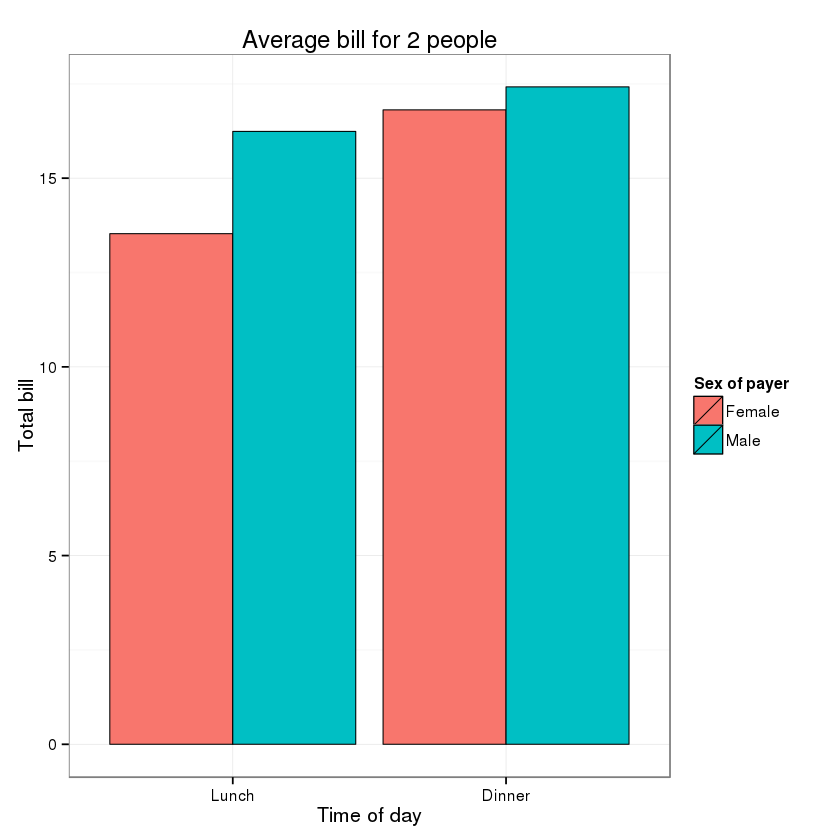

In [24]:
# A bar graph
ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) + 
    geom_bar(colour="black", stat="identity",
             position=position_dodge(),
             size=.3) +                        # Thinner lines
    scale_fill_hue(name="Sex of payer") +      # Set legend title
    xlab("Time of day") + ylab("Total bill") + # Set axis labels
    ggtitle("Average bill for 2 people") +     # Set title
    theme_bw()

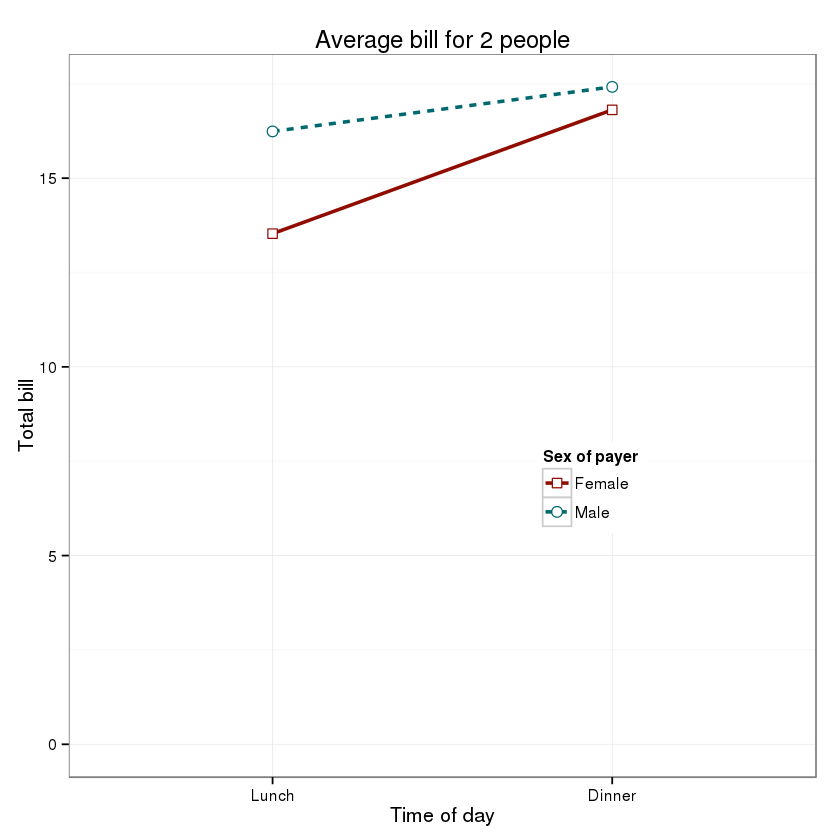

In [25]:
# A line graph
ggplot(data=dat1, aes(x=time, y=total_bill, group=sex, shape=sex, colour=sex)) + 
    geom_line(aes(linetype=sex), size=1) +     # Set linetype by sex
    geom_point(size=3, fill="white") +         # Use larger points, fill with white
    expand_limits(y=0) +                       # Set y range to include 0
    scale_colour_hue(name="Sex of payer",      # Set legend title
                     l=30)  +                  # Use darker colors (lightness=30)
    scale_shape_manual(name="Sex of payer",
                       values=c(22,21)) +      # Use points with a fill color
    scale_linetype_discrete(name="Sex of payer") +
    xlab("Time of day") + ylab("Total bill") + # Set axis labels
    ggtitle("Average bill for 2 people") +     # Set title
    theme_bw() +
    theme(legend.position=c(.7, .4))           # Position legend inside
                                               # This must go after theme_bw

In the line graph, the reason that the legend title, “Sex of payer”, must be specified three times is so that there is only one legend. The issue is explained here.

### With a numeric x-axis

When the variable on the x-axis is numeric, it is sometimes useful to treat it as continuous, and sometimes useful to treat it as categorical. In this data set, the dose is a numeric variable with values 0.5, 1.0, and 2.0. It might be useful to treat these values as equal categories when making a graph.

In [26]:
datn <- read.table(header=TRUE, text='
supp dose length
  OJ  0.5  13.23
  OJ  1.0  22.70
  OJ  2.0  26.06
  VC  0.5   7.98
  VC  1.0  16.77
  VC  2.0  26.14
')

This is derived from the `ToothGrowth` dataset included with R.

### With x-axis treated as continuous

A simple graph might put dose on the x-axis as a numeric value. It is possible to make a line graph this way, but not a bar graph.

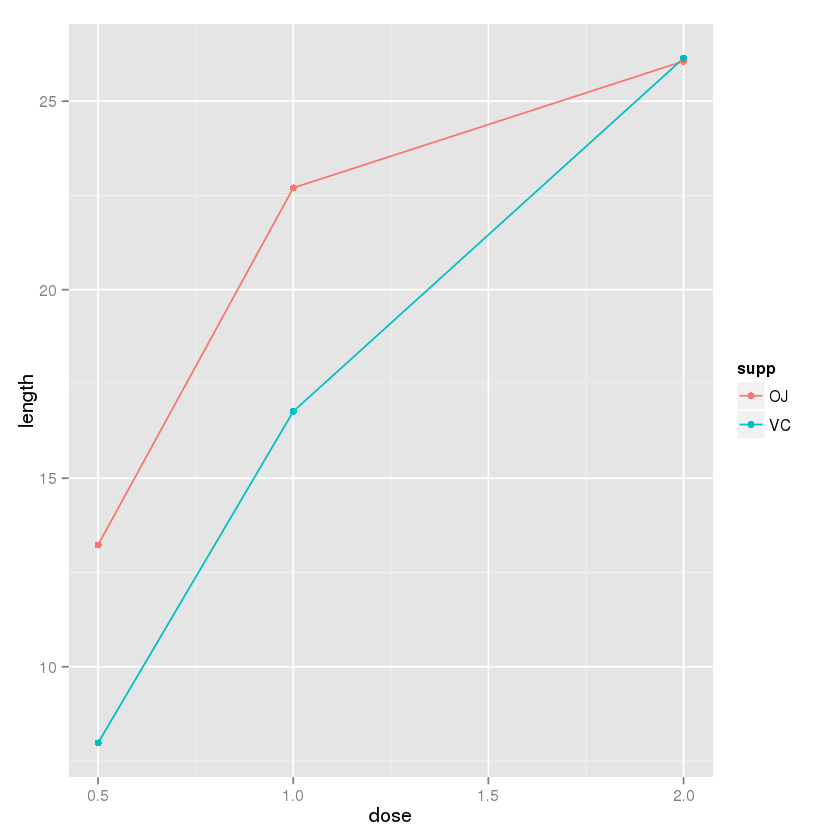

In [27]:
ggplot(data=datn, aes(x=dose, y=length, group=supp, colour=supp)) +
    geom_line() +
    geom_point()

### With x-axis treated as categorical

If you wish to treat it as a categorical variable instead of a numeric one, it must be converted to a factor. This can be done by modifying the data frame, or by changing the specification of the graph.

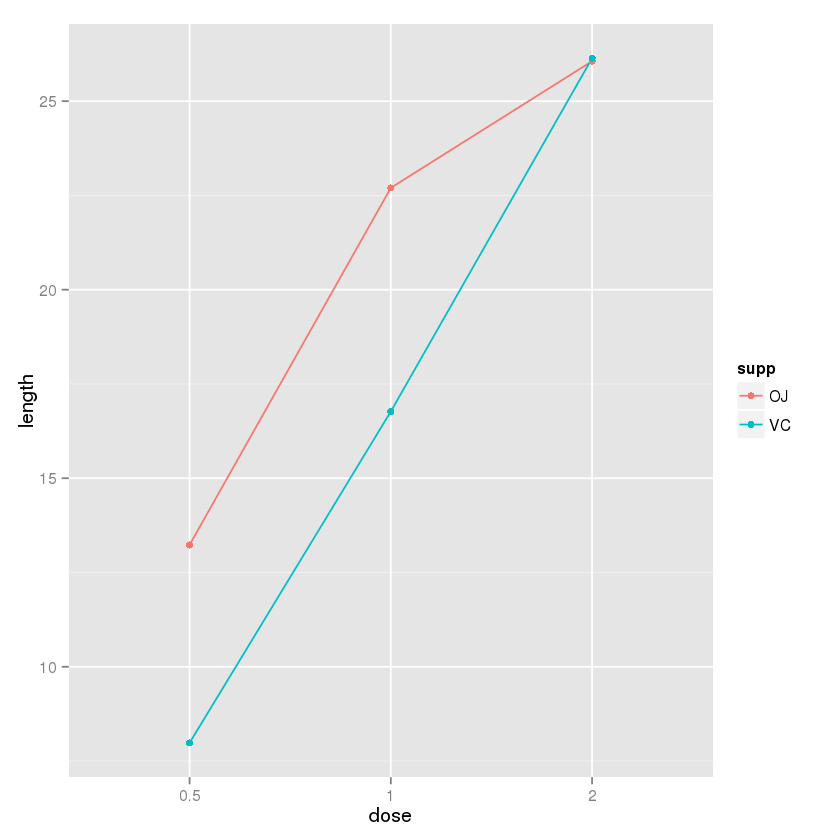

In [28]:
# Copy the data frame and convert dose to a factor
datn2 <- datn
datn2$dose <- factor(datn2$dose)
ggplot(data=datn2, aes(x=dose, y=length, group=supp, colour=supp)) +
    geom_line() +
    geom_point()

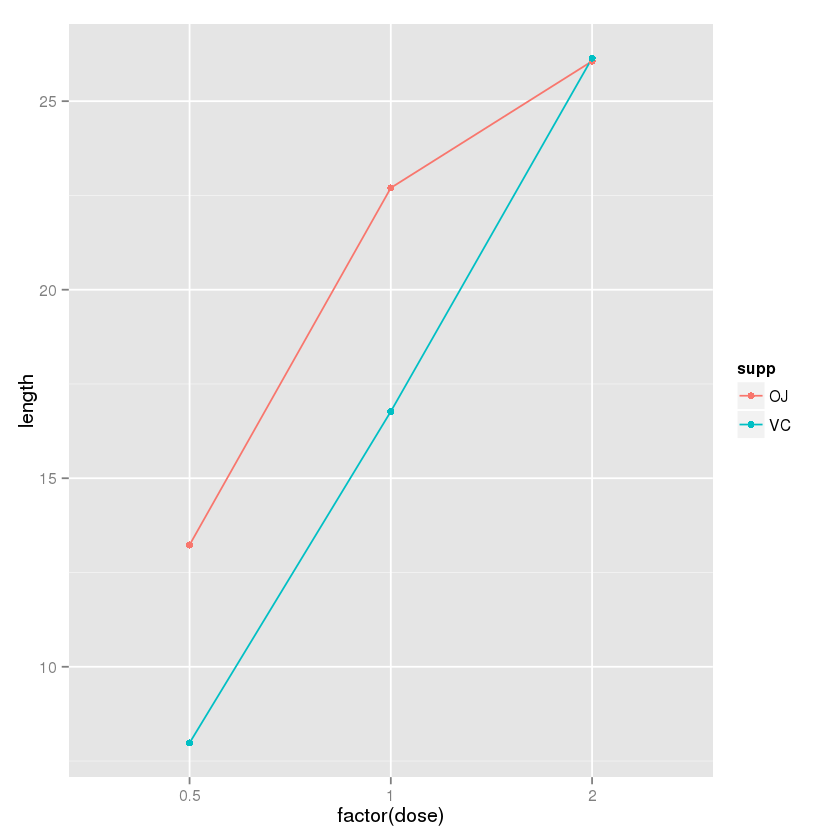

In [29]:
# Use the original data frame, but put factor() directly in the plot specification
ggplot(data=datn, aes(x=factor(dose), y=length, group=supp, colour=supp)) +
    geom_line() +
    geom_point()

It is also possible to make a bar graph when the variable is treated as categorical rather than numeric.

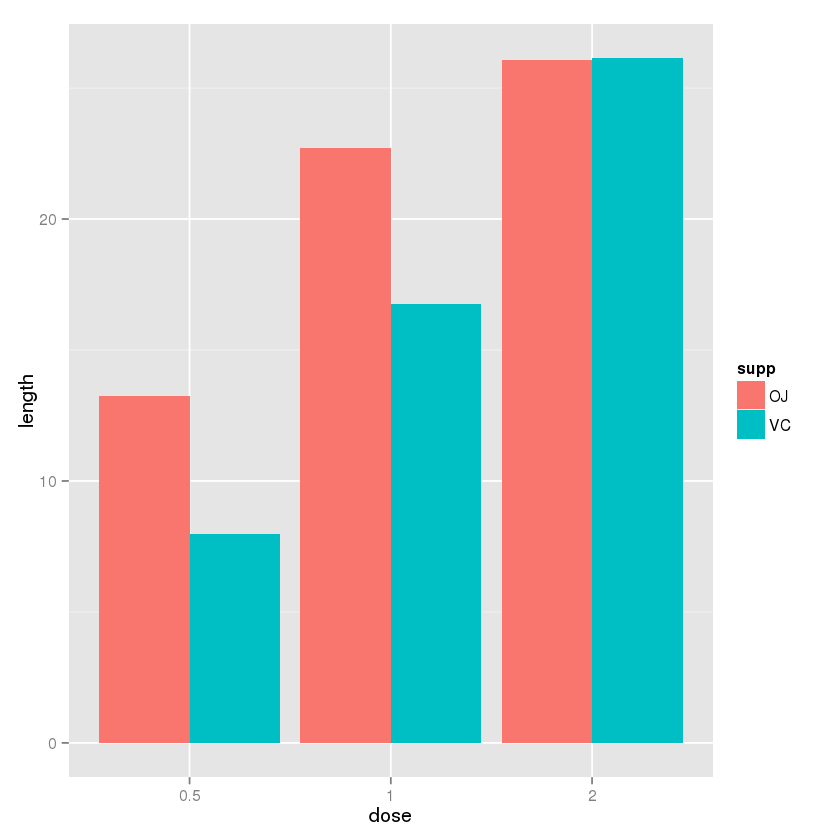

In [30]:
# Use datn2 from above
ggplot(data=datn2, aes(x=dose, y=length, fill=supp)) +
    geom_bar(stat="identity", position=position_dodge())


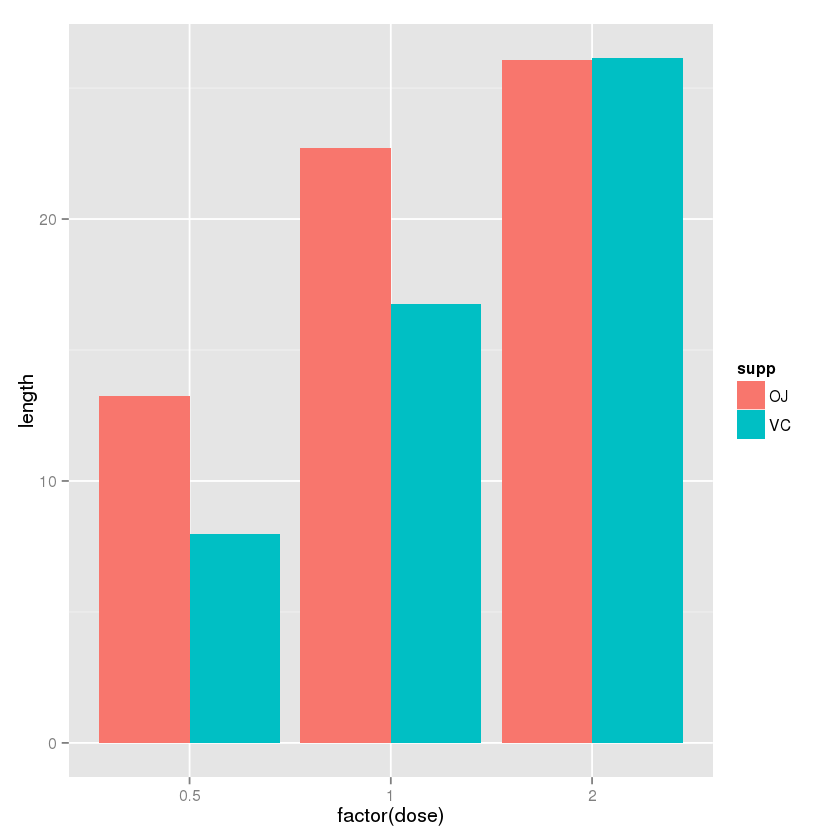

In [31]:
# Use the original data frame, but put factor() directly in the plot specification
ggplot(data=datn, aes(x=factor(dose), y=length, fill=supp)) +
    geom_bar(stat="identity", position=position_dodge())